In [193]:
import pandas as pd
import numpy as np
import sklearn
from sklearn import linear_model
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
from matplotlib import style
import pickle

In [194]:
data = pd.read_csv("student-mat.csv", sep=";")
# Since our data is seperated by semicolons we need to do sep=";"

In [195]:
print(data.head())

  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        6   5   6   6  
1      5        3      3     1     1      3        4   5   5   6  
2      4        3      2     2     3      3       10   7   8  10  
3      3        2      2     1     1      5        2  15  14  15  
4      4        3      2     1     2      5        4   6  10  10  

[5 rows x 33 columns]


In [196]:
data = data[["G1", "G2", "G3", "studytime", "failures", "absences"]]
data = shuffle(data) # Optional - shuffle the data

In [197]:
predict = "G3"

X = np.array(data.drop([predict], 1)) # Features
y = np.array(data[predict]) # Labels

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


In [198]:
# TRAIN MODEL MULTIPLE TIMES FOR BEST SCORE
best = 0
for _ in range(10000):
    x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.1)

    linear = linear_model.LinearRegression()

    linear.fit(x_train, y_train)
    acc = linear.score(x_test, y_test)
    print("Accuracy: " + str(acc))
    
    # If the current model has a better score than one we've already trained then save it
    if acc > best:
        best = acc
        with open("studentgrades.pickle", "wb") as f:
            pickle.dump(linear, f)

Streaming output truncated to the last 5000 lines.
Accuracy: 0.8953972843918657
Accuracy: 0.7650763918499881
Accuracy: 0.8735356593652015
Accuracy: 0.7956358863836878
Accuracy: 0.8106854458092086
Accuracy: 0.8088835728706045
Accuracy: 0.8841544356031983
Accuracy: 0.6792622686207404
Accuracy: 0.8035220241266887
Accuracy: 0.8364019772539493
Accuracy: 0.8243457670892093
Accuracy: 0.840528708872541
Accuracy: 0.7473021520666611
Accuracy: 0.873051728427087
Accuracy: 0.8533852182664263
Accuracy: 0.8467311057796204
Accuracy: 0.8553244035093459
Accuracy: 0.942762470317446
Accuracy: 0.8245840409518692
Accuracy: 0.619561409644692
Accuracy: 0.7606136893965958
Accuracy: 0.7827268340752455
Accuracy: 0.7798119533334468
Accuracy: 0.8110293886502195
Accuracy: 0.877543925289956
Accuracy: 0.8579662110170843
Accuracy: 0.9085110151799163
Accuracy: 0.8727665113224475
Accuracy: 0.831164832732862
Accuracy: 0.865704751629304
Accuracy: 0.8305625531265681
Accuracy: 0.8332223711205444
Accuracy: 0.7719772815541311

In [209]:
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.1)

In [200]:
# LOAD MODEL
pickle_in = open("studentgrades.pickle", "rb")
linear = pickle.load(pickle_in)


In [210]:
acc = linear.score(x_test, y_test)
print(acc)

0.9172954876459876


In [211]:
print('Coefficient: \n', linear.coef_) # These are each slope value
print('Intercept: \n', linear.intercept_) # This is the intercept

Coefficient: 
 [ 0.1523447   0.98352366 -0.19658429 -0.26819916  0.03825128]
Intercept: 
 -1.5379812119304361


predictions = linear.predict([100, 100, 100, 100, 200]) # Gets a list of all predictions

for x in range(len(predictions)):
    print(predictions[x], x_test[x], y_test[x])

In [212]:
predictions = linear.predict(x_test) # Gets a list of all predictions

for x in range(len(predictions)): print(predictions[x], x_test[x], y_test[x])

17.226267698029297 [16 17  2  0  0] 17
6.929636292341174 [9 8 1 3 6] 10
19.165412870174748 [17 18  2  0 21] 18
8.385634552444197 [ 7 10  4  1  2] 10
11.02241753528177 [11 11  2  0 12] 11
5.189190156601599 [ 6  6  2  2 22] 4
9.504036405345227 [10 10  2  0  2] 11
14.910291384289721 [15 15  3  0  0] 15
7.013141145963354 [ 9  7  2  0 18] 6
-1.0170815653147751 [6 0 2 0 0] 0
9.131872768289735 [11  9  2  0 14] 9
13.21831211276321 [12 13  2  0 14] 12
15.335722931037267 [16 15  2  0  2] 15
14.910951786315884 [14 15  3  0  4] 16
14.320596705029484 [14 14  1  0  4] 14
11.235147532007527 [11 12  3  1  4] 11
3.292523540078248 [6 5 1 3 0] 0
10.563402216508418 [11 11  2  0  0] 10
5.894165526640986 [5 8 2 3 0] 7
15.265869088525502 [14 15  1  0  3] 16
14.244094151900592 [14 14  1  0  2] 14
5.424245771488883 [7 6 1 0 5] 7
19.36089653205463 [18 18  1  1 24] 18
9.808725813808469 [12 10  2  0  2] 11
9.26387293282895 [10 10  4  0  6] 11
12.841347430228728 [11 13  1  1 10] 13
13.612494811048963 [11 12  2  0 

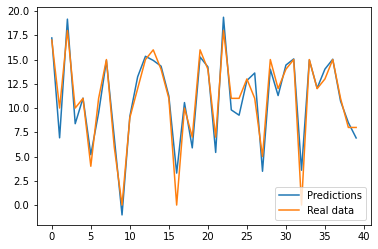

In [216]:
plt.plot(predictions, label="Predictions")
plt.plot(y_test, label="Real data")
plt.legend(loc=4)
plt.savefig('graph.png', dpi=250)